In [50]:
# import library
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = 'simple_white'

In [51]:
df = pd.read_csv('data_rumah123-new.csv')
df.tail(10)

,km-tidur,km-mandi,garasi,bangunan,tanah,lokasi,harga
5990,2,1,1,36.0,72.0,Bekasi,2993723296
5991,4,3,0,136.0,128.0,Bekasi,3020000000
5992,2,1,0,72.0,42.0,Bekasi,2993723296
5993,3,2,2,230.0,210.0,Bekasi,2200000000
5994,3,2,1,97.0,67.0,Bekasi,2993723296
5995,3,3,2,83.0,78.0,Bekasi,2993723296
5996,2,1,1,30.0,60.0,Bekasi,2993723296
5997,2,1,1,30.0,55.0,Bekasi,2993723296
5998,3,3,0,219.0,114.0,Bekasi,3500000000
5999,6,4,0,350.0,163.0,Bekasi,2300000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   km-tidur  6000 non-null   int64  
 1   km-mandi  6000 non-null   int64  
 2   garasi    6000 non-null   int64  
 3   bangunan  6000 non-null   float64
 4   tanah     6000 non-null   float64
 5   lokasi    6000 non-null   object 
 6   harga     6000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 328.2+ KB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km-tidur,6000.0,3.377333e+00,2.105237e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.100000e+01
km-mandi,6000.0,2.635667e+00,1.973215e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,5.000000e+01
garasi,6000.0,9.738333e-01,1.203214e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+01
bangunan,6000.0,1.808360e+02,2.222493e+02,1.000000e+00,6.800000e+01,1.200000e+02,2.040000e+02,6.220000e+03
tanah,6000.0,1.931050e+02,4.581786e+02,1.000000e+00,7.500000e+01,1.080000e+02,1.880000e+02,2.000000e+04
harga,6000.0,4.828866e+09,1.093091e+10,1.000000e+09,1.800000e+09,2.993723e+09,4.881466e+09,2.950000e+11


In [54]:
df.isnull().sum()

km-tidur    0
km-mandi    0
garasi      0
bangunan    0
tanah       0
lokasi      0
harga       0
dtype: int64

In [55]:
df.duplicated().sum()

1547

In [56]:
df.drop_duplicates()

,km-tidur,km-mandi,garasi,bangunan,tanah,lokasi,harga
0,5,5,4,1200.0,483.0,Jakarta,45000000000
1,4,4,2,800.0,660.0,Jakarta,50000000000
2,25,25,0,600.0,525.0,Jakarta,11500000000
3,5,4,2,190.0,118.0,Jakarta,2700000000
4,3,3,2,120.0,120.0,Jakarta,2900000000
...,...,...,...,...,...,...,...
5993,3,2,2,230.0,210.0,Bekasi,2200000000
5994,3,2,1,97.0,67.0,Bekasi,2993723296
5997,2,1,1,30.0,55.0,Bekasi,2993723296
5998,3,3,0,219.0,114.0,Bekasi,3500000000


In [57]:
for x in ['km-tidur']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
#remove NaN
df = df.dropna(axis = 0)

In [58]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['km-tidur']))
fig.add_trace(go.Box(x=df['km-mandi']))
fig.show()

In [59]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = df["km-tidur"], name="KT", texttemplate="%{y}"), ).update_xaxes(categoryorder='total descending')
fig.update_layout(title="Kamar Tidur", title_x=.5, )
fig.show()

In [60]:
cp_df = df.copy()
for x in cp_df['tanah']:
    if x <= 100:
        cp_df.tanah.replace(x, '<=100', inplace=True)
    elif x > 100 and x <=200:
        cp_df.tanah.replace(x, '<=200', inplace=True)
    elif x > 200 and x <= 300:
        cp_df.tanah.replace(x, '<=300', inplace=True)
    else:
        cp_df.tanah.replace(x, '>400', inplace=True)


In [61]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'xy'}, {'type':'domain'}]])

fig.add_trace(go.Histogram(x = cp_df["tanah"],name="Luas Tanah"),row=1, col=1)
fig.add_trace(go.Pie(labels = cp_df["tanah"] ,name="Luas Tanah", textinfo='percent+label', textposition='inside', marker=dict(line=dict(color='white', width=1))),row=1, col=2)

fig.update_layout(showlegend=False, title="Luas Tanah (m²)", title_x=.5)

fig.show()

In [62]:
cp_df['TM'] = cp_df['km-tidur'] + cp_df['km-mandi']

In [63]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'xy'}, {'type':'xy'}],[{'type':'xy'}, None]], subplot_titles=("Jumlah Kamar Tidur, Kamar mandi", "Jumlah Kamar Tidur", "Jumlah Kamar Mandi"))

fig.add_trace(go.Histogram(x = cp_df["TM"],name="TM"),row=1, col=1)
fig.add_trace(go.Histogram(x = df["km-tidur"] ,name="Kamar Tidur"),row=2, col=1)
fig.add_trace(go.Histogram(x = df["km-mandi"] ,name="Kamar Mandi"),row=1, col=2)

fig.update_layout(showlegend=False, title_x=.5)

fig.show()

In [64]:
fig = px.scatter(df, x='tanah', y='harga', color="lokasi",  trendline='ols')
fig.show()

In [65]:
fig = px.scatter(df, x="bangunan", y="harga", color="lokasi")
fig.show()

In [66]:
df['km-tidur'] = df['km-tidur'].astype(int)

In [67]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['lokasi']= le.fit_transform(df['lokasi'])
  
df['lokasi'].unique()

array([3, 1, 2, 4, 5, 0])

In [68]:
df_corr = df.corr()

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
        colorscale = ["#1f76b5", "white", "#ff7e0f"],
        showscale=False
    )
)
fig.update_layout(height=500, title="Correlation Matrix", title_x=.5)
fig.show()

In [69]:
df.head()

,km-tidur,km-mandi,garasi,bangunan,tanah,lokasi,harga
0,5,5,4,1200.0,483.0,3,45000000000
1,4,4,2,800.0,660.0,3,50000000000
3,5,4,2,190.0,118.0,3,2700000000
4,3,3,2,120.0,120.0,3,2900000000
5,3,4,3,500.0,1300.0,3,22000000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   km-tidur  5925 non-null   int32  
 1   km-mandi  5925 non-null   int64  
 2   garasi    5925 non-null   int64  
 3   bangunan  5925 non-null   float64
 4   tanah     5925 non-null   float64
 5   lokasi    5925 non-null   int32  
 6   harga     5925 non-null   int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 324.0 KB


In [71]:
from sklearn.preprocessing import StandardScaler
X = df.drop(df[['harga']], axis=1)
y = df[['harga']]

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=2)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4740, 6) (1185, 6)
(4740, 1) (1185, 1)


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(x_train, np.ravel(y_train, order='C'))

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
rf_pred = rf.predict(x_test)
rf_pred

array([-0.34130756, -0.26286287,  0.01915014, ..., -0.01664413,
       -0.10636659, -0.29157588])

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, rf_pred)

0.6304679598809879

## Hyperparameter Tuning

In [76]:
n_estimators = [5,20,50,100, 200, 300, 400] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [77]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [78]:
rf_random.fit(x_train, np.ravel(y_train, order='C'))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100, 200,
                                                         300, 400]},
                   random_state=35, verbose=2)

In [79]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 200, 300, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}  



In [80]:
randmf = RandomForestRegressor(n_estimators = 200, min_samples_split = 6, min_samples_leaf= 4, max_features = 'sqrt', max_depth= 50, bootstrap=True) 
randmf.fit( x_train, y_train) 

C:\Users\yerem\AppData\Local\Temp\ipykernel_25212\2246519830.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=6, n_estimators=200)

In [81]:
rf_pred = randmf.predict(x_test)
rf_pred

array([-0.32171446, -0.2732999 , -0.03940909, ..., -0.01356244,
       -0.19175407, -0.20388726])

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, rf_pred)

0.6448352147109154

In [113]:

import matplotlib.pyplot as plt
# Visualising the Random Forest Regression results
  
# arrange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(x), max(x), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, randmf.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: 'numpy.float64' object is not callable

## ANN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(4147, 6)
(1778, 6)


In [ ]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [ ]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=128,
              epochs=500)

Epoch 1/500
33/33 [==============================] - 1s 8ms/step - loss: 0.9243 - val_loss: 1.0772
Epoch 2/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8931 - val_loss: 1.0200
Epoch 3/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8814 - val_loss: 1.0082
Epoch 4/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8516 - val_loss: 0.9598
Epoch 5/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8495 - val_loss: 0.9372
Epoch 6/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8427 - val_loss: 0.9242
Epoch 7/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8168 - val_loss: 0.8982
Epoch 8/500
33/33 [==============================] - 0s 3ms/step - loss: 0.8187 - val_loss: 0.9007
Epoch 9/500
33/33 [==============================] - 0s 3ms/step - loss: 0.7990 - val_loss: 0.8626
Epoch 10/500
33/33 [==============================] - 0s 3ms/step - loss: 0.7933 - val_loss: 0.8575
Epoch 11/

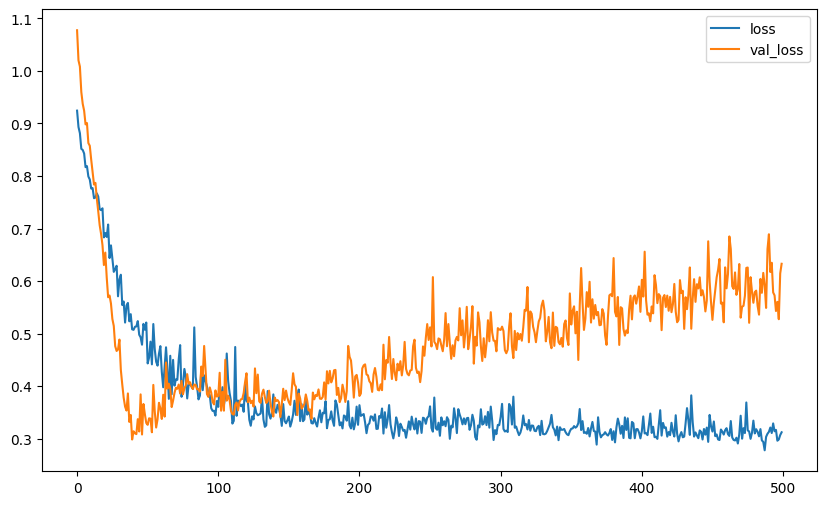

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

56/56 [==============================] - 0s 1ms/step
========Training Result=======
MAE:  0.17016534106338124
MSE:  0.2843013375748837
RMSE:  0.5331991537642231
R2 Square:  0.6987464575534856
=========Testing Result=======
MAE:  0.2028980686490956
MSE:  0.6329794182014742
RMSE:  0.7956000365770945
R2 Square:  0.4404561145395558
